```
MACHINE PROJECT 1 - DIGITAL IMAGES AND DSP
CRUZ, AIRON JOHN R.
IMAGPRO - S12
```

#Part 1: MATRIX ANALYSIS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


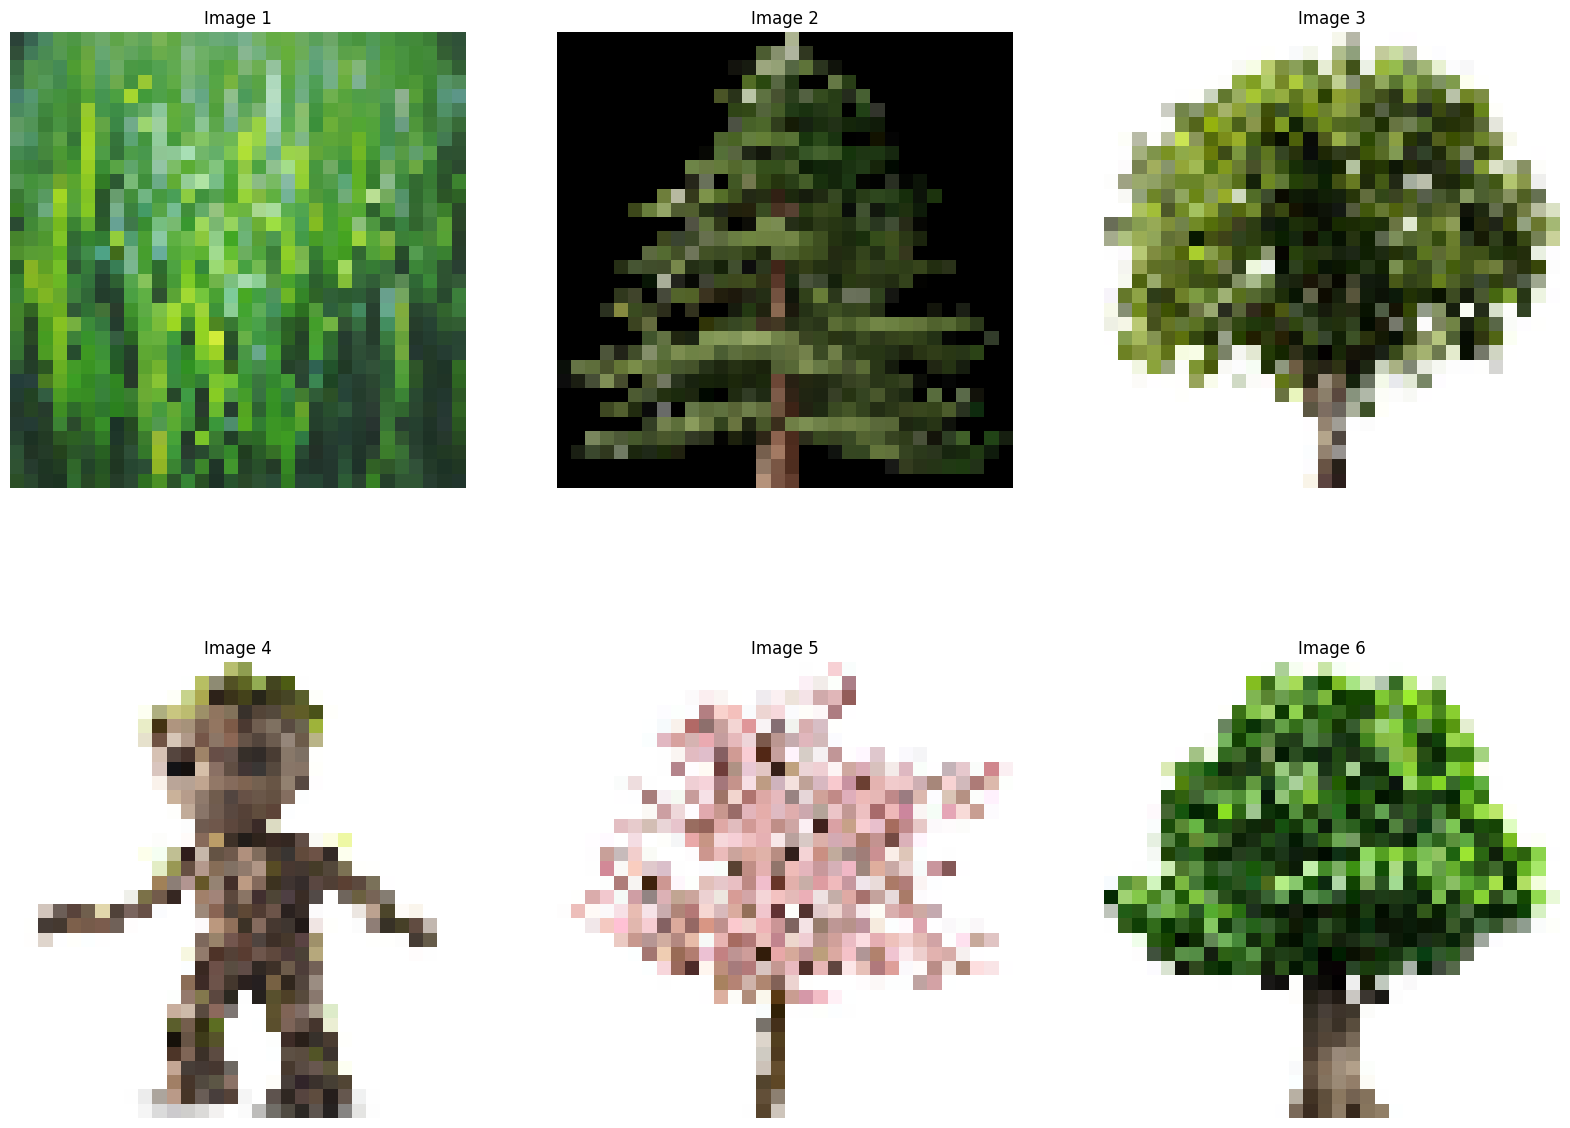



Shape of the Resulting Image Tensor:  (6, 32, 32, 3) 



In [71]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# List to stored all the resized images from the dataset
image_dataset = []
filenames = ['data1.jpg', 'data2.png','data3.jpg', 'data4.jpg', 'data5.jpg', 'data6.jpg']
DIRECTORY_IMG = '/content/drive/My Drive/IMAGPRO-MP1/'


for file in filenames:
  # Read all images in the dataset included in the filenames list
  orig_image = cv2.imread(f'{DIRECTORY_IMG}/{file}')

  if file.endswith('.png'):
    orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGRA2RGB)
  else:
    orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

  # Resize all six images to 32 by 32
  resized_image = cv2.resize(orig_image, (32,32))
  # Store them to image_dataset list
  image_dataset.append(resized_image)



# Convert the resulting list of resized images into Numpy array (tensor) for visualization and further operations
image_tensor = np.array(image_dataset)

# # Visualize all the images using Pyplot
plt.figure(figsize=(20,15))


for i in range(len(image_tensor)):
  plt.subplot(2,3,i+1)
  plt.imshow(image_tensor[i])
  plt.axis('off')
  plt.title(f'Image {i+1}')

plt.show()

# Checking the tensor shape
print("\n\nShape of the Resulting Image Tensor: ", image_tensor.shape, "\n")
# print("Shape of ")






**Explain the shape of the resulting variable and the quality of the images**

*Answer:*


> The resulting variable, with a shape of **`(6, 32, 32, 3)`**, contains a set of images described by specific dimensions. The first dimension (6) indicates there are 6 images in total. Each image has a height and width of 32 pixels, while the fourth dimension (3) means each pixel in the images is made up of Red, Green, and Blue (RGB) color channels.

> In the evaluation of the image quality, multiple factors necessitate consideration. Firstly, the resolution of the images, post-resizing to 32x32 pixels, assumes significance. While this resolution may suffice for certain applications such as pattern recognition or classification, its suitability may diminish in scenarios necessitating heightened precision or intricate detail.

> However, attention must also be directed towards the potential implications of compression, influenced by the original quality and compression of the input images. In this context, the resizing process to a smaller resolution resulted in the loss of detail or clarity, particularly since the original images were of a higher resolution. Furthermore, it can be observed as well that the overall quality of the resulting images is contingent upon the caliber of the original images in the dataset. Specifically, clear, well-lit, and high-resolution original images will likely retain their quality after resizing, while low-quality or blurry original images may not.

> Overall, the *`resulting variable contains images resized to a lower resolution (pixelated)  while preserving RGB color information`*. This makes them (resized images) suitable for various machine learning taks such as visualizations and feature extractions.





**Determine the Shape of the Images**

In [72]:
# Check for the shape of each resized image
for i in range(len(image_tensor)):
  print(f"Shape of Image {i+1}: ", image_tensor[i].shape, "\n")

Shape of Image 1:  (32, 32, 3) 

Shape of Image 2:  (32, 32, 3) 

Shape of Image 3:  (32, 32, 3) 

Shape of Image 4:  (32, 32, 3) 

Shape of Image 5:  (32, 32, 3) 

Shape of Image 6:  (32, 32, 3) 




> It was clearly shown above that the shape of all six images is now *`(32, 32, 3)`* after resizing, while the shape of the entire tensor is *`(6, 32, 32, 3)`* as previously discussed. The results showcased that all images were uniformly resized to 1024 pixels RGB images.



**Finally, save the tensor as an .npy file**

In [73]:
# Filename of the npy file to be stored within the same gdrive as the dataset
TENSOR_FILENAME = 'tensor_image.npy'

# Use np function to save the .npy file
np.save(f'{DIRECTORY_IMG}/{TENSOR_FILENAME}', image_tensor)

#Part 2: IMAGE STATISTICS


## Image 1

**Take the first image: How many pixels are there in total?**

In [74]:
# Get/Take the first image from the tensor
image1 = image_tensor[0]

# Computing the total number of pixels within the first image
total_pixels = image1.shape[0] * image1.shape[1]
print('Total Number of pixels in the image: ', total_pixels)
print('Image Size: ', image1.size)

Total Number of pixels in the image:  1024
Image Size:  3072




> There are a total of **`1024 pixels`** within the image based on the executed code above. The resulting value was obtained by getting the product of its spatial dimensions (such as width and height, 32x32), regardless of the number of color channels. On the other hand, the image size equates to *`3072`*, which is the expected total number of elements within the array given the respective three channels of the 1024 pixels.



**Take the average of each pixel per channel.**

In [75]:
# This reshapes the image into a 2D array wherein each row corresponds to a pixel,
# while each column corresponds to a channel (Red, Green, Blue, respectively)
pixels_2d = image1.reshape(-1,3)

# Using the 2D array generated above, this now calculates the average value
# of each pixel per color/channel
ave_per_channel = np.mean(pixels_2d, axis=0)

# ave_per_channel = np.mean(image1, axis=(0,1))
# print('Per pixels: ', pixels_2d, '\n')
print('Average of each pixel per channel : ', ave_per_channel, '\n')
print(f'Average RED per pixel: {ave_per_channel[0]:.4f}\n')
print(f'Average GREEN per pixel: {ave_per_channel[1]:.4f}\n')
print(f'Average BLUE per pixel: {ave_per_channel[2]:.4f}\n')
# print('Average of each pixel per channel (using second option): ', ave_per_channel)

Average of each pixel per channel :  [ 76.64746094 136.44824219  63.99804688] 

Average RED per pixel: 76.6475

Average GREEN per pixel: 136.4482

Average BLUE per pixel: 63.9980




> Based on the displayed results, the `average GREEN value per pixel` is notably higher at approximately `136.4482`. This indicates that the GREEN channel contributes significantly more intensity to each pixel compared to the RED and BLUE channels. The elevated average GREEN value suggests the prevalence of lush greenery, foliage, or other elements dominated by the GREEN color in the image. This observation aligns with the actual and original content of the image being a grassy landscape.

**How many pixels are equal to 0.5 and less than 0.5?**

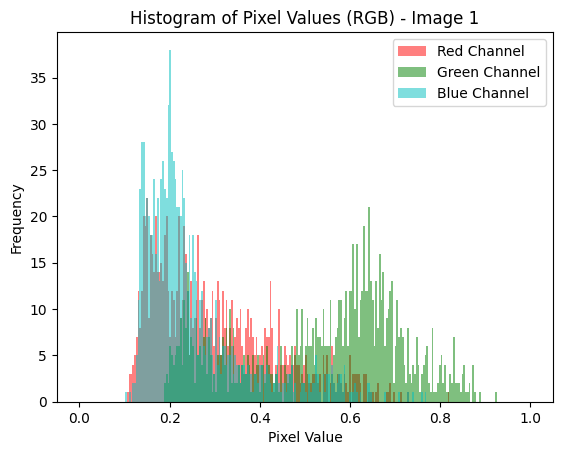


Number of pixels with a value equal to 0.5 and less than 0.5 for each channel:

Red Channel: 920
Green Channel: 369
Blue Channel: 958


In [76]:
# This normalizes the image [0, 1] from the original range  [0, 255]
normalized_image = image1 / 255.0
# cv2_imshow(cv2.resize(normalized_image, (0, 0), fx=20, fy=20))

# Generates a histogram for the normalized image
n_r, bins_r, _ = plt.hist(normalized_image[..., 0].ravel(), bins=256, range=(0, 1), color='r', alpha=0.5, label='Red Channel')
n_g, bins_g, _ = plt.hist(normalized_image[..., 1].ravel(), bins=256, range=(0, 1), color='g', alpha=0.5, label='Green Channel')
n_b, bins_b, _ = plt.hist(normalized_image[..., 2].ravel(), bins=256, range=(0, 1), color='c', alpha=0.5, label='Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values (RGB) - Image 1')
plt.legend()
plt.show()

# Find the bin index corresponding to the pixel value = 0.5
bin_index = np.searchsorted(bins_r, 0.5)
# Count the number of pixels equal to 0.5 and less than 0.5
pixels_elt0pt5_red = int(np.sum(n_r[:bin_index]))
pixels_elt0pt5_green = int(np.sum(n_g[:bin_index]))
pixels_elt0pt5_blue = int(np.sum(n_b[:bin_index]))

# print(f"Normalized: {normalized_image}")
print("\nNumber of pixels with a value equal to 0.5 and less than 0.5 for each channel:\n")
print("Red Channel:", pixels_elt0pt5_red)
print("Green Channel:", pixels_elt0pt5_green)
print("Blue Channel:", pixels_elt0pt5_blue)


> Based on the histogram above, the prevalence of darker or lower intensity pixels in the `Red (920 pixels)` and `Blue channels (958 pixels)`, as evidenced by their higher counts of pixels with values equal to or less than 0.5, contributes significantly to the overall darker appearance of the image. This phenomenon can be attributed to the nature of the color spectrum, where lower intensity values in the Red and Blue channels result in darker hues compared to the `Green channel (369 pixels)`, influencing the **overall visual perception of the image as dim or subdued**.



## Images 2 to 6

------------ RESULTS FOR IMAGE 2 -----------


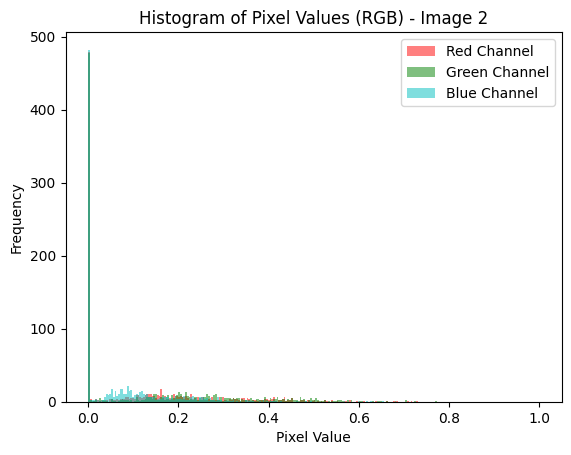


Total Number of pixels in Image 2: 1024

Average of each pixel per channel in Image 2:  [31.75292969 37.76074219 19.75878906] 

Average RED per pixel: 31.7529

Average GREEN per pixel: 37.7607

Average BLUE per pixel: 19.7588


Number of pixels with a value equal to 0.5 and less than 0.5 for each channel in Image 2:

Red Channel: 1001
Green Channel: 982
Blue Channel: 1019 

------------ RESULTS FOR IMAGE 3 -----------


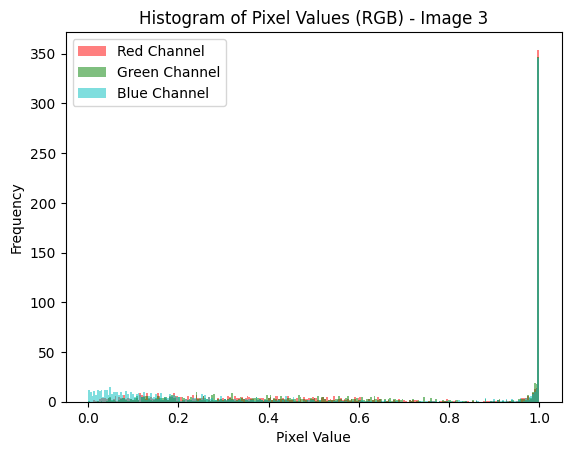


Total Number of pixels in Image 3: 1024

Average of each pixel per channel in Image 3:  [156.98242188 165.25097656 134.98632812] 

Average RED per pixel: 156.9824

Average GREEN per pixel: 165.2510

Average BLUE per pixel: 134.9863


Number of pixels with a value equal to 0.5 and less than 0.5 for each channel in Image 3:

Red Channel: 448
Green Channel: 395
Blue Channel: 550 

------------ RESULTS FOR IMAGE 4 -----------


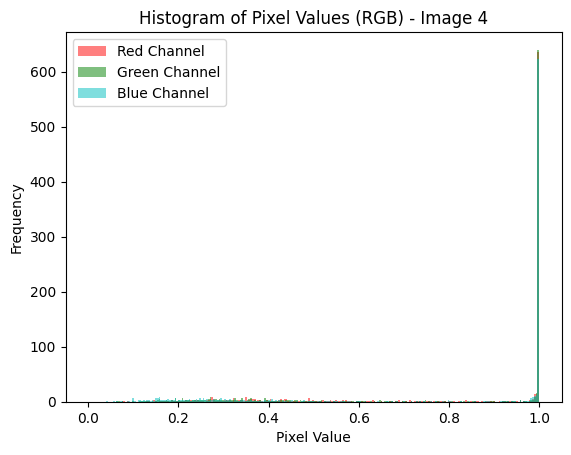


Total Number of pixels in Image 4: 1024

Average of each pixel per channel in Image 4:  [207.04785156 202.22851562 196.26660156] 

Average RED per pixel: 207.0479

Average GREEN per pixel: 202.2285

Average BLUE per pixel: 196.2666


Number of pixels with a value equal to 0.5 and less than 0.5 for each channel in Image 4:

Red Channel: 230
Green Channel: 267
Blue Channel: 293 

------------ RESULTS FOR IMAGE 5 -----------


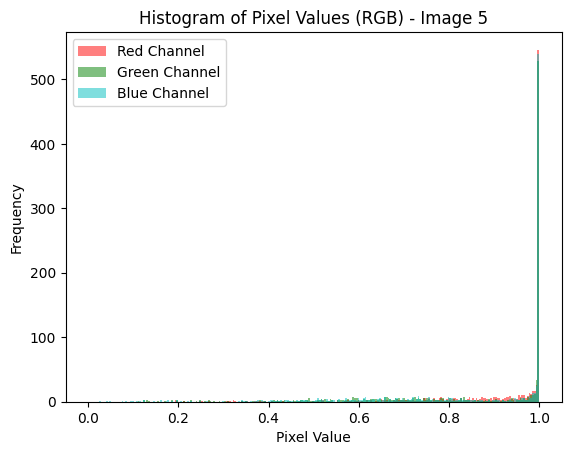


Total Number of pixels in Image 5: 1024

Average of each pixel per channel in Image 5:  [234.89550781 220.43066406 219.25292969] 

Average RED per pixel: 234.8955

Average GREEN per pixel: 220.4307

Average BLUE per pixel: 219.2529


Number of pixels with a value equal to 0.5 and less than 0.5 for each channel in Image 5:

Red Channel: 29
Green Channel: 72
Blue Channel: 81 

------------ RESULTS FOR IMAGE 6 -----------


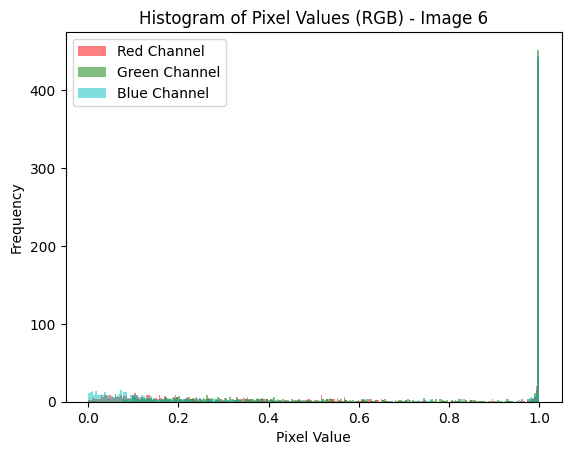


Total Number of pixels in Image 6: 1024

Average of each pixel per channel in Image 6:  [156.30859375 175.97753906 144.65527344] 

Average RED per pixel: 156.3086

Average GREEN per pixel: 175.9775

Average BLUE per pixel: 144.6553


Number of pixels with a value equal to 0.5 and less than 0.5 for each channel in Image 6:

Red Channel: 440
Green Channel: 356
Blue Channel: 501 



In [77]:
for i in range(1, 6):  # Loop through images 2 to 6
    image = image_tensor[i]

    # Computes the total number of pixels within the image
    total_pixels = image.shape[0] * image.shape[1]
    # print(f'Total Number of pixels in Image {i}: {total_pixels}')

    # Reshapes the image into a 2D array where each row corresponds to a pixel and each column corresponds to a channel
    pixels_2d = image.reshape(-1, 3)

    # Calculating the average value of each pixel per color/channel
    ave_per_channel = np.mean(pixels_2d, axis=0)

    # Normalizing the image [0, 1] from the original range [0, 255]
    normalized_image = image / 255.0


    # Generates a histogram for the normalized image
    n_r, bins_r, _ = plt.hist(normalized_image[..., 0].ravel(), bins=256, range=(0, 1), color='r', alpha=0.5, label='Red Channel')
    n_g, bins_g, _ = plt.hist(normalized_image[..., 1].ravel(), bins=256, range=(0, 1), color='g', alpha=0.5, label='Green Channel')
    n_b, bins_b, _ = plt.hist(normalized_image[..., 2].ravel(), bins=256, range=(0, 1), color='c', alpha=0.5, label='Blue Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Pixel Values (RGB) - Image {i+1}')
    plt.legend()
    print(f"------------ RESULTS FOR IMAGE {i+1} -----------")
    plt.show()

    # Find the bin index corresponding to the pixel value = 0.5
    bin_index = np.searchsorted(bins_r, 0.5)
    # Count the number of pixels equal to 0.5 and less than 0.5
    pixels_elt0pt5_red = int(np.sum(n_r[:bin_index]))
    pixels_elt0pt5_green = int(np.sum(n_g[:bin_index]))
    pixels_elt0pt5_blue = int(np.sum(n_b[:bin_index]))

    # Printing the results obtained for each image
    print(f'\nTotal Number of pixels in Image {i+1}: {total_pixels}\n')
    print(f'Average of each pixel per channel in Image {i+1}: ', ave_per_channel, '\n')
    print(f'Average RED per pixel: {ave_per_channel[0]:.4f}\n')
    print(f'Average GREEN per pixel: {ave_per_channel[1]:.4f}\n')
    print(f'Average BLUE per pixel: {ave_per_channel[2]:.4f}\n')
    print(f"\nNumber of pixels with a value equal to 0.5 and less than 0.5 for each channel in Image {i+1}:\n")
    print("Red Channel:", pixels_elt0pt5_red)
    print("Green Channel:", pixels_elt0pt5_green)
    print("Blue Channel:", pixels_elt0pt5_blue, "\n")

**Results Discussion**

*Image 2*
*   The average pixel values per channel reveal that, on average, each pixel has a relatively low intensity of `red` (31.7529), `green` (37.7607), and `blue` (19.7588).

*   Additionally, a large number of pixels in each channel have values equal to or less than 0.5, with 1001 pixels in the red channel, 982 pixels in the green channel, and 1019 pixels in the blue channel. This suggests a predominance of darker shades or colors closer to black in the image.


*Image 3*
* The average pixel values per channel in Image 3 show significantly higher intensities compared to Image 2, with `red` averaging at 156.9824, `green` at 165.2510, and blue` at 134.9863. This indicates a richer and brighter color palette in Image 3.
* The distribution of pixel values also differs, with fewer pixels in each channel having values equal to or less than 0.5 compared to Image 2. Specifically, there are 448 pixels in the `red` channel, 395 pixels in the `green` channel, and 550 pixels in the `blue` channel with values equal to or less than 0.5.

*Image 4*
* The average pixel values per channel in Image 4 are relatively high, with `red` averaging at 207.0479, `green` at 202.2285, and `blue` at 196.2666.
* Similar to Image 3, Image 4 exhibits fewer pixels in each channel with values equal to or less than 0.5 compared to Image 2. Specifically, there are 230 pixels in the `red` channel, 267 pixels in the `green` channel, and 293 pixels in the `blue` channel with values equal to or less than 0.5.


*Image 5*
* The average pixel values per channel in Image 5 are relatively high as well, with `red` averaging at 234.8955, `green` at 220.4307, and `blue` at 219.2529.
* In contrast to Images 3 and 4, Image 5 exhibits a smaller number of pixels in each channel with values equal to or less than 0.5. Specifically, there are 29 pixels in the `red` channel, 72 pixels in the `green` channel, and 81 pixels in the `blue` channel with values equal to or less than 0.5.

*Image 6*
* The average pixel values per channel in Image 6 are somewhat intermediate compared to the previous images, with `red` averaging at 156.3086, `green` at 175.9775, and `blue` at 144.6553.
* Similar to Image 3, Image 6 shows a relatively smaller number of pixels in each channel with values equal to or less than 0.5 compared to Image 2. But these values are considerably high comapared to previous images. Specifically, there are 440 pixels in the `red` channel, 356 pixels in the `green` channel, and 501 pixels in the `blue` channel with values equal to or less than 0.5.




#Part 3: Basic Signal Processing

## 3.1 Amplification and Attenuation

Apply amplification and attenuation operations onto the image by a factor of 0.3.

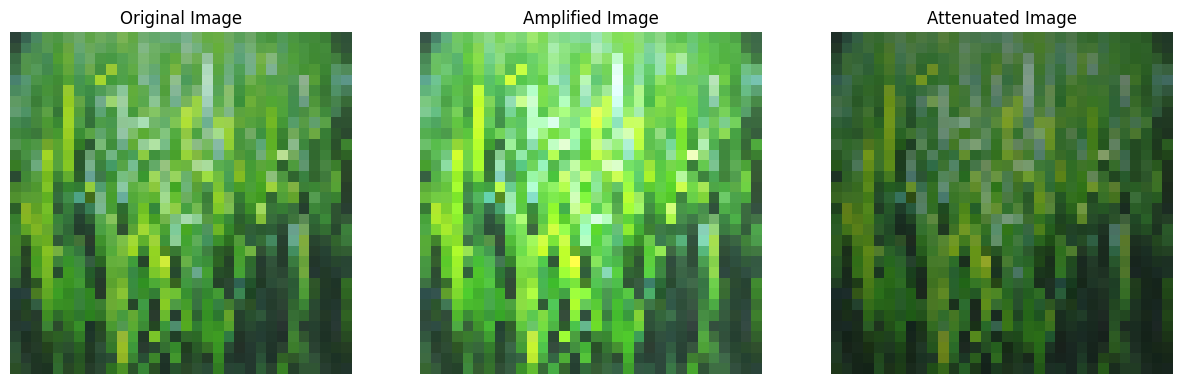

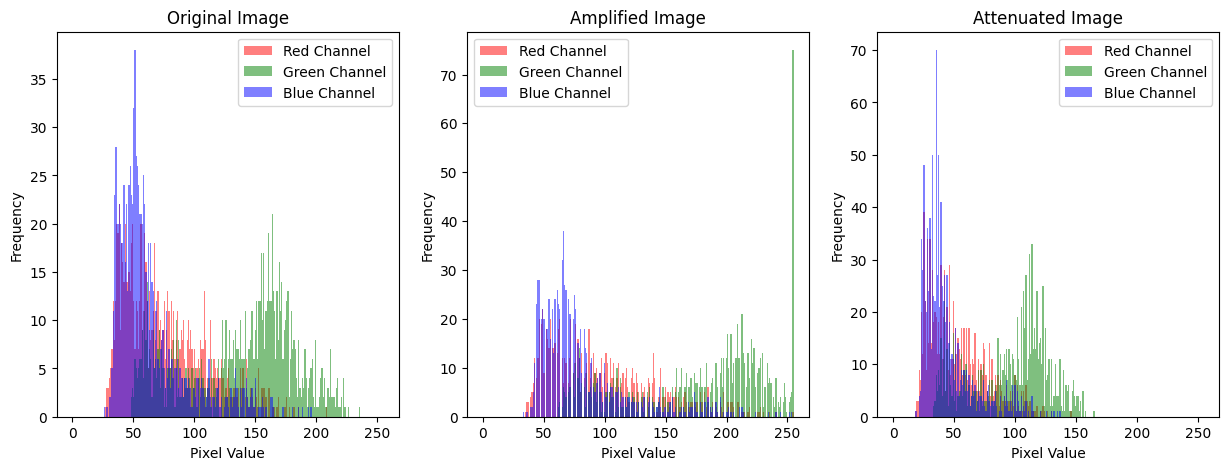

In [78]:
# Get/Take the first image from the tensor
image1 = image_tensor[0]

# Amplify by a factor of 0.3 ==> image * (1 + 0.3) = 1.3. This increases the intensity of the image by 30%.
amplified_image = image1.astype(float) * 1.3
# Attenuate by a factor of 0.3 ==> image * (1 - 0.3) = 0.7. This decreases the intensity of the image by 30%.
attenuated_image = image1.astype(float) * 0.7

# amplified = image.astype(float) * 1.3
# attenuated = image.astype(float) / 1.3

# print(f"Amp 1: {amplified_image}")
# print(f"Amp 2: {amplified}")
# print(f"Atten 1: {attenuated_image}")
# print(f"Atten 2: {attenuated}")

# Convert back to unsigned int representation for display purposes
amplified_image = np.clip(amplified_image, 0, 255).astype(np.uint8)
attenuated_image = np.clip(attenuated_image, 0, 255).astype(np.uint8)

# Display all the three images a) Original, b) Amplified, c) Attenuated
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(image1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(amplified_image)
plt.title('Amplified Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(attenuated_image)
plt.title('Attenuated Image')
plt.axis('off')

# Display histograms for each channel of the images
plt.figure(figsize=(15, 5))

# Original Image Histograms
plt.subplot(1, 3, 1)
plt.hist(image1[:, :, 0].ravel(), bins=256, range=(0, 255), color='r', alpha=0.5, label='Red Channel')
plt.hist(image1[:, :, 1].ravel(), bins=256, range=(0, 255), color='g', alpha=0.5, label='Green Channel')
plt.hist(image1[:, :, 2].ravel(), bins=256, range=(0, 255), color='b', alpha=0.5, label='Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Original Image')
plt.legend()

# Amplified Image Histograms
plt.subplot(1, 3, 2)
plt.hist(amplified_image[:, :, 0].ravel(), bins=256, range=(0, 255), color='r', alpha=0.5, label='Red Channel')
plt.hist(amplified_image[:, :, 1].ravel(), bins=256, range=(0, 255), color='g', alpha=0.5, label='Green Channel')
plt.hist(amplified_image[:, :, 2].ravel(), bins=256, range=(0, 255), color='b', alpha=0.5, label='Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Amplified Image')
plt.legend()

# Attenuated Image Histograms
plt.subplot(1, 3, 3)
plt.hist(attenuated_image[:, :, 0].ravel(), bins=256, range=(0, 255), color='r', alpha=0.5, label='Red Channel')
plt.hist(attenuated_image[:, :, 1].ravel(), bins=256, range=(0, 255), color='g', alpha=0.5, label='Green Channel')
plt.hist(attenuated_image[:, :, 2].ravel(), bins=256, range=(0, 255), color='b', alpha=0.5, label='Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Attenuated Image')
plt.legend()

plt.show()


**What did you notice? What does the operation imply?**

> Upon applying the amplification and attenuation operations to the image by a factor of 0.3, several observations become apparent.

>Firstly, the amplification operation significantly increases the brightness and contrast of the image, making it appear more vivid and pronounced. This enhancement in intensity highlights details and enhances visibility in various regions of the image.

>Conversely, the attenuation operation decreases the intensity of the image, resulting in a dimmer and less pronounced appearance. This reduction in brightness and contrast softens harsh contrasts and reduces glare, leading to a more subdued visual representation.

>Overall, these operations serve to manipulate the pixel values of the image to either enhance or diminish its visual characteristics. The amplification operation is particularly useful for highlighting details and improving visibility in specific areas of the image, while the attenuation operation can be employed to soften harsh contrasts or reduce glare in overly bright regions. These observations are reinforced by the histograms displayed above, which illustrate the alterations in pixel value distributions following each modification. The histograms provide valuable insights into the distribution of pixel intensities across different color channels, highlighting the impact of amplification and attenuation on the overall image characteristics.

**Amplification and Attenuation of Images 2 to 6**

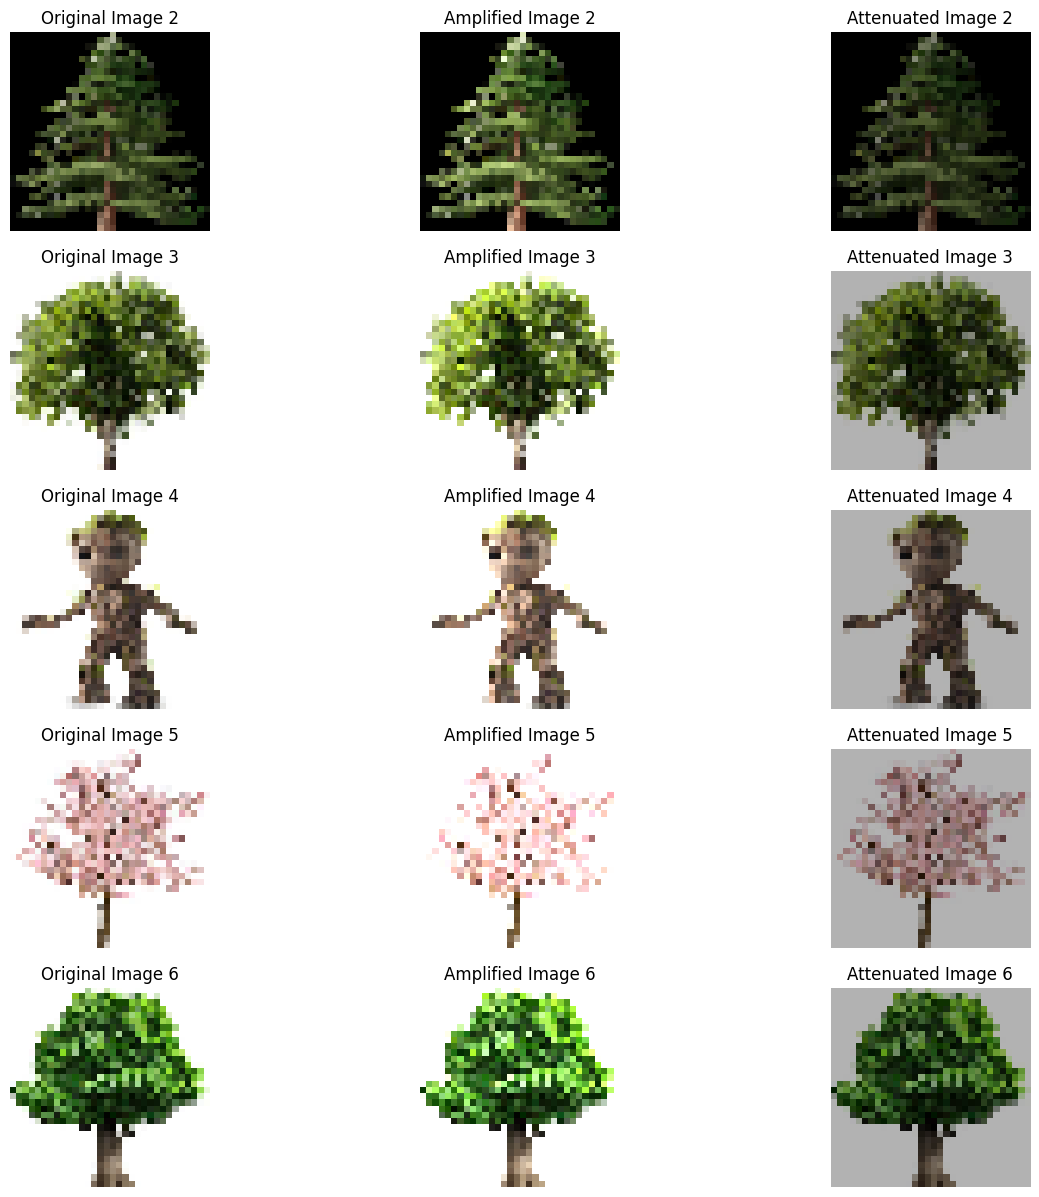

In [79]:
# amplified_images = [[] for _ in range(5)]
# attenuated_images = [[] for _ in range(5)]

plt.figure(figsize=(15,15))
for i in range(5):
  image = image_tensor[i+1]
  # Amplify by a factor of 0.3 ==> image * (1 + 0.3) = 1.3. This increases the intensity of the image by 30%.
  amplified_image = image.astype(float) * 1.3
  # Attenuate by a factor of 0.3 ==> image * (1 - 0.3) = 0.7. This decreases the intensity of the image by 30%.
  attenuated_image = image.astype(float) * 0.7
  # Convert back to unsigned int representation for display purposes
  amplified_image = np.clip(amplified_image, 0, 255).astype(np.uint8)
  attenuated_image = np.clip(attenuated_image, 0, 255).astype(np.uint8)

  plt.subplot(5, 3, i*3 + 1)
  plt.imshow(image_tensor[i+1])
  plt.title(f'Original Image {i+2}')
  plt.axis('off')

    # Amplified Image
  plt.subplot(5, 3, i*3 + 2)
  plt.imshow(amplified_image)
  plt.title(f'Amplified Image {i+2}')
  plt.axis('off')

    # Attenuated Image
  plt.subplot(5, 3, i*3 + 3)
  plt.imshow(attenuated_image)
  plt.title(f'Attenuated Image {i+2}')
  plt.axis('off')


# # Plot original images, amplified images, and attenuated images
# for i in range(5):
#     # Original Image
plt.show()

> After applying amplification and attenuation by a factor of 0.3 to the other images, similar observations were noted. The amplification significantly enhanced the brightness of the images, notably in Image 4, where specific original details were intensified due to the heightened intensity. However, it's important to note that in some cases, this increase in brightness led to the removal of certain parts of the image, particularly in areas where the amplified color now matches the background, resulting in a loss of visual distinction. Conversely, the attenuation led to a notable change in the background color of most images, transitioning from their original white background to a subdued gray hue. This alteration in background color may be attributed to the reduction in intensity, which affected the overall visual appearance of the images.

## 3.2 Element-wise Multiplication

Try to do element-wise multiplication of the values 0.1, 0,2, 0.5, and 1.0 to the image.

**Approach 1: Without normalization and clipping**


image1_mult01: [[[ 4.3  6.6  5.6]
  [ 5.6 10.   8.1]
  [ 7.4 13.6  9.7]
  ...
  [ 6.  12.6  5.4]
  [ 5.   8.7  5.3]
  [ 4.7  8.1  5.6]]

 [[ 4.9  7.8  5.6]
  [ 6.6 12.2  8.8]
  [ 7.4 13.9  8.3]
  ...
  [ 6.7 13.9  5.8]
  [ 5.2  9.5  5.1]
  [ 4.9  8.3  5.6]]

 [[ 5.6 10.4  6.6]
  [ 8.2 14.8  7.7]
  [ 7.7 14.4  7.8]
  ...
  [ 6.5 13.6  5.6]
  [ 6.6 12.6  6.2]
  [ 5.   9.5  5.2]]

 ...

 [[ 4.5  8.1  5.3]
  [ 3.3  5.1  3.6]
  [ 3.6  5.9  4. ]
  ...
  [ 3.1  5.4  3.8]
  [ 3.3  5.7  3.5]
  [ 3.7  6.1  3.5]]

 [[ 4.7  8.2  5. ]
  [ 3.8  5.9  4.6]
  [ 3.   5.3  3.5]
  ...
  [ 3.5  5.8  4.1]
  [ 2.8  5.   3.7]
  [ 3.2  5.5  3.5]]

 [[ 4.3  7.8  3.8]
  [ 4.1  7.   4.6]
  [ 3.1  5.2  3.6]
  ...
  [ 3.9  6.1  4.8]
  [ 3.2  5.3  3.9]
  [ 3.3  5.3  4.4]]]

image1_mult02: [[[ 8.6 13.2 11.2]
  [11.2 20.  16.2]
  [14.8 27.2 19.4]
  ...
  [12.  25.2 10.8]
  [10.  17.4 10.6]
  [ 9.4 16.2 11.2]]

 [[ 9.8 15.6 11.2]
  [13.2 24.4 17.6]
  [14.8 27.8 16.6]
  ...
  [13.4 27.8 11.6]
  [10.4 19.  10.2]
  [ 9.8

(-0.5, 31.5, 31.5, -0.5)

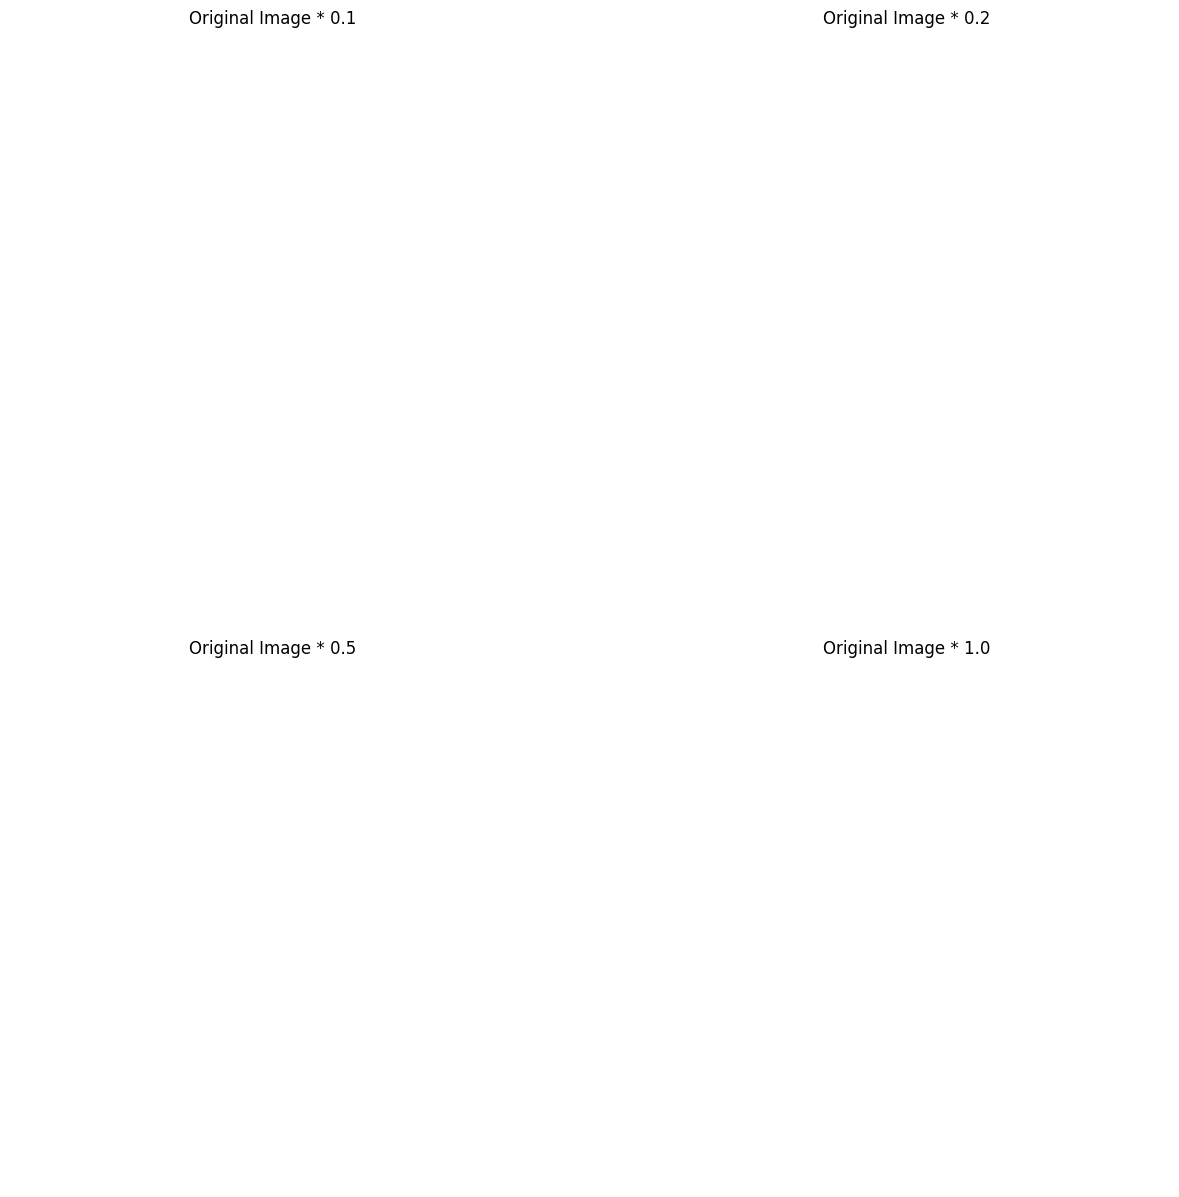

In [80]:
# Get/Take the first image from the tensor
image1 = image_tensor[0]

# # Performs element-wise multiplication operation
image1_mult01 = image1 * 0.1
image1_mult02 = image1 * 0.2
image1_mult05 = image1 * 0.5
image1_mult10 = image1 * 1.0

print("\nimage1_mult01:",image1_mult01)
print("\nimage1_mult02:",image1_mult02)
print("\nimage1_mult05",image1_mult05)
print("\nimage1_mult10",image1_mult10)

# Dislay all the four images
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(image1_mult01)
plt.title('Original Image * 0.1')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image1_mult02)
plt.title('Original Image * 0.2')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(image1_mult05)
plt.title('Original Image * 0.5')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(image1_mult10)
plt.title('Original Image * 1.0')
plt.axis('off')

**Explanation**

> The warning message *`"Clipping input data to the valid range for imshow with RGB data"`* indicates that the pixel values of the image data are outside the valid range expected by the plotting function imshow. This warning typically occurs when the pixel values exceed the range of [0, 1] for floating-point data or [0, 255] for integer data. When the pixel values deviate from these ranges, as seen in this case, the plotting function encounters difficulty in accurately representing the image.

**Approach 2: With Floating-Point Conversion and Clipping applied**


image1_mult01: [[[ 4  6  5]
  [ 5 10  8]
  [ 7 13  9]
  ...
  [ 6 12  5]
  [ 5  8  5]
  [ 4  8  5]]

 [[ 4  7  5]
  [ 6 12  8]
  [ 7 13  8]
  ...
  [ 6 13  5]
  [ 5  9  5]
  [ 4  8  5]]

 [[ 5 10  6]
  [ 8 14  7]
  [ 7 14  7]
  ...
  [ 6 13  5]
  [ 6 12  6]
  [ 5  9  5]]

 ...

 [[ 4  8  5]
  [ 3  5  3]
  [ 3  5  4]
  ...
  [ 3  5  3]
  [ 3  5  3]
  [ 3  6  3]]

 [[ 4  8  5]
  [ 3  5  4]
  [ 3  5  3]
  ...
  [ 3  5  4]
  [ 2  5  3]
  [ 3  5  3]]

 [[ 4  7  3]
  [ 4  7  4]
  [ 3  5  3]
  ...
  [ 3  6  4]
  [ 3  5  3]
  [ 3  5  4]]]

image1_mult02: [[[ 8 13 11]
  [11 20 16]
  [14 27 19]
  ...
  [12 25 10]
  [10 17 10]
  [ 9 16 11]]

 [[ 9 15 11]
  [13 24 17]
  [14 27 16]
  ...
  [13 27 11]
  [10 19 10]
  [ 9 16 11]]

 [[11 20 13]
  [16 29 15]
  [15 28 15]
  ...
  [13 27 11]
  [13 25 12]
  [10 19 10]]

 ...

 [[ 9 16 10]
  [ 6 10  7]
  [ 7 11  8]
  ...
  [ 6 10  7]
  [ 6 11  7]
  [ 7 12  7]]

 [[ 9 16 10]
  [ 7 11  9]
  [ 6 10  7]
  ...
  [ 7 11  8]
  [ 5 10  7]
  [ 6 11  7]]

 [[ 8 15  

(-0.5, 31.5, 31.5, -0.5)

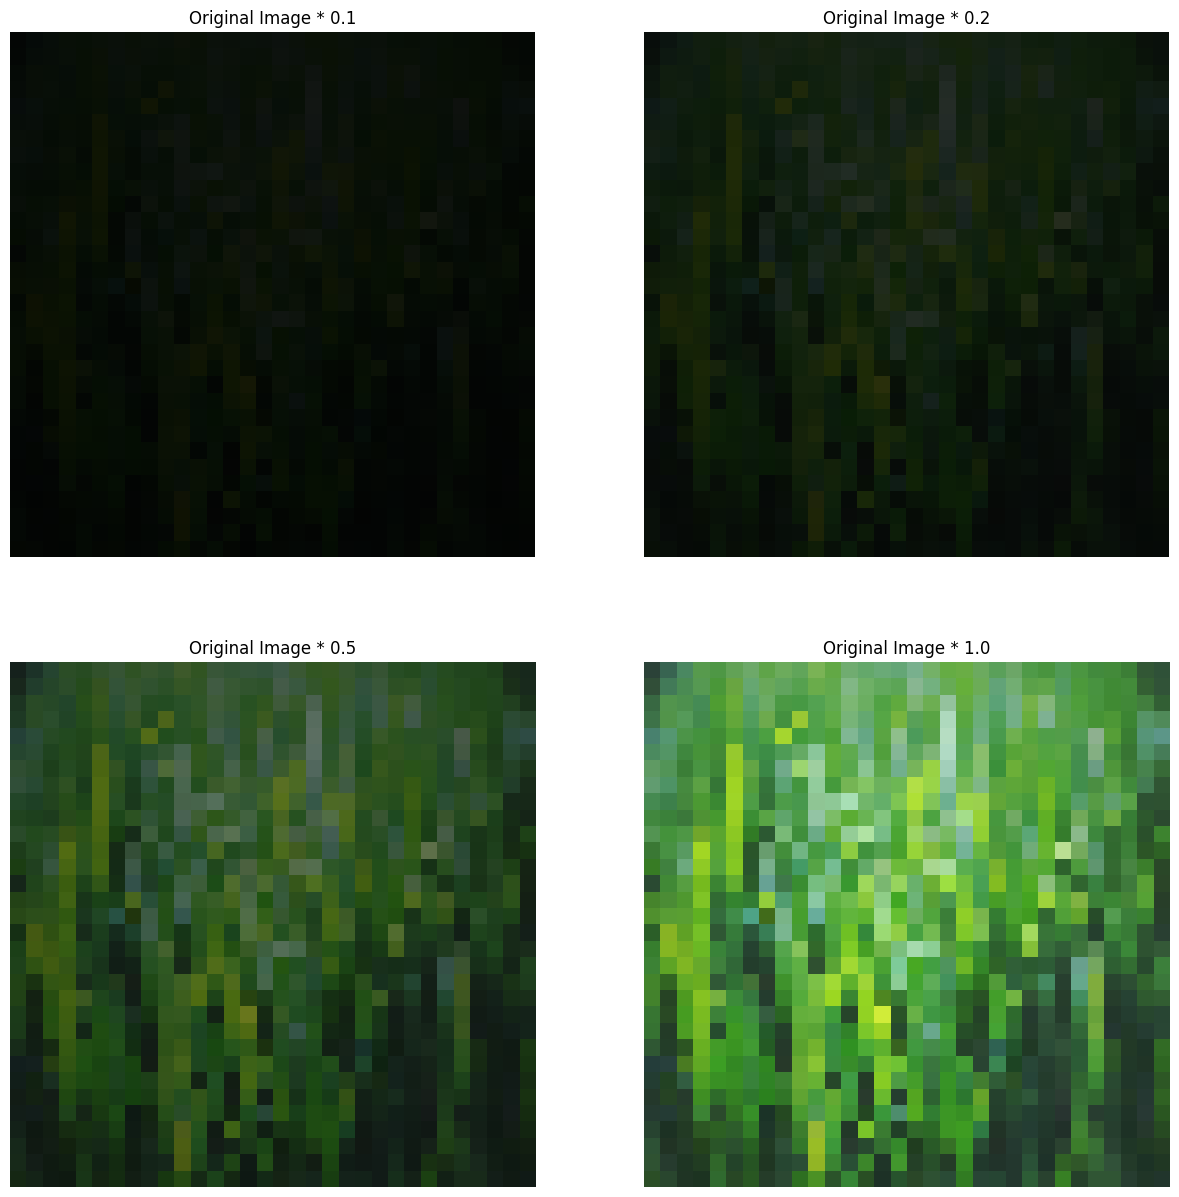

In [81]:
# Get/Take the first image from the tensor
image1 = image_tensor[0]

# Converts the image to floating point representation
image1_float = image1.astype(float)

# Performs element-wise multiplication operation
image1_mult01 = image1_float * 0.1
image1_mult02 = image1_float * 0.2
image1_mult05 = image1_float * 0.5
image1_mult10 = image1_float * 1.0

# Converts back to unsigned int representation for display purposes
image1_mult01 = np.clip(image1_mult01, 0, 255).astype(np.uint8)
image1_mult02 = np.clip(image1_mult02, 0, 255).astype(np.uint8)
image1_mult05 = np.clip(image1_mult05, 0, 255).astype(np.uint8)
image1_mult10 = np.clip(image1_mult10, 0, 255).astype(np.uint8)

print("\nimage1_mult01:",image1_mult01)
print("\nimage1_mult02:",image1_mult02)
print("\nimage1_mult05",image1_mult05)
print("\nimage1_mult10",image1_mult10)

# Dislay all the four images
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(image1_mult01)
plt.title('Original Image * 0.1')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image1_mult02)
plt.title('Original Image * 0.2')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(image1_mult05)
plt.title('Original Image * 0.5')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(image1_mult10)
plt.title('Original Image * 1.0')
plt.axis('off')


**Approach 3: With Normalization Applied on top of the previous approach**


image1_mult01: [[[ 4  6  5]
  [ 5 10  8]
  [ 7 13  9]
  ...
  [ 6 12  5]
  [ 5  8  5]
  [ 4  8  5]]

 [[ 4  7  5]
  [ 6 12  8]
  [ 7 13  8]
  ...
  [ 6 13  5]
  [ 5  9  5]
  [ 4  8  5]]

 [[ 5 10  6]
  [ 8 14  7]
  [ 7 14  7]
  ...
  [ 6 13  5]
  [ 6 12  6]
  [ 5  9  5]]

 ...

 [[ 4  8  5]
  [ 3  5  3]
  [ 3  5  4]
  ...
  [ 3  5  3]
  [ 3  5  3]
  [ 3  6  3]]

 [[ 4  8  5]
  [ 3  5  4]
  [ 3  5  3]
  ...
  [ 3  5  4]
  [ 2  5  3]
  [ 3  5  3]]

 [[ 4  7  3]
  [ 4  7  4]
  [ 3  5  3]
  ...
  [ 3  6  4]
  [ 3  5  3]
  [ 3  5  4]]]

image1_mult02: [[[ 8 13 11]
  [11 20 16]
  [14 27 19]
  ...
  [12 25 10]
  [10 17 10]
  [ 9 16 11]]

 [[ 9 15 11]
  [13 24 17]
  [14 27 16]
  ...
  [13 27 11]
  [10 19 10]
  [ 9 16 11]]

 [[11 20 13]
  [16 29 15]
  [15 28 15]
  ...
  [13 27 11]
  [13 25 12]
  [10 19 10]]

 ...

 [[ 9 16 10]
  [ 6 10  7]
  [ 7 11  8]
  ...
  [ 6 10  7]
  [ 6 11  7]
  [ 7 12  7]]

 [[ 9 16 10]
  [ 7 11  9]
  [ 6 10  7]
  ...
  [ 7 11  8]
  [ 5 10  7]
  [ 6 11  7]]

 [[ 8 15  

(-0.5, 31.5, 31.5, -0.5)

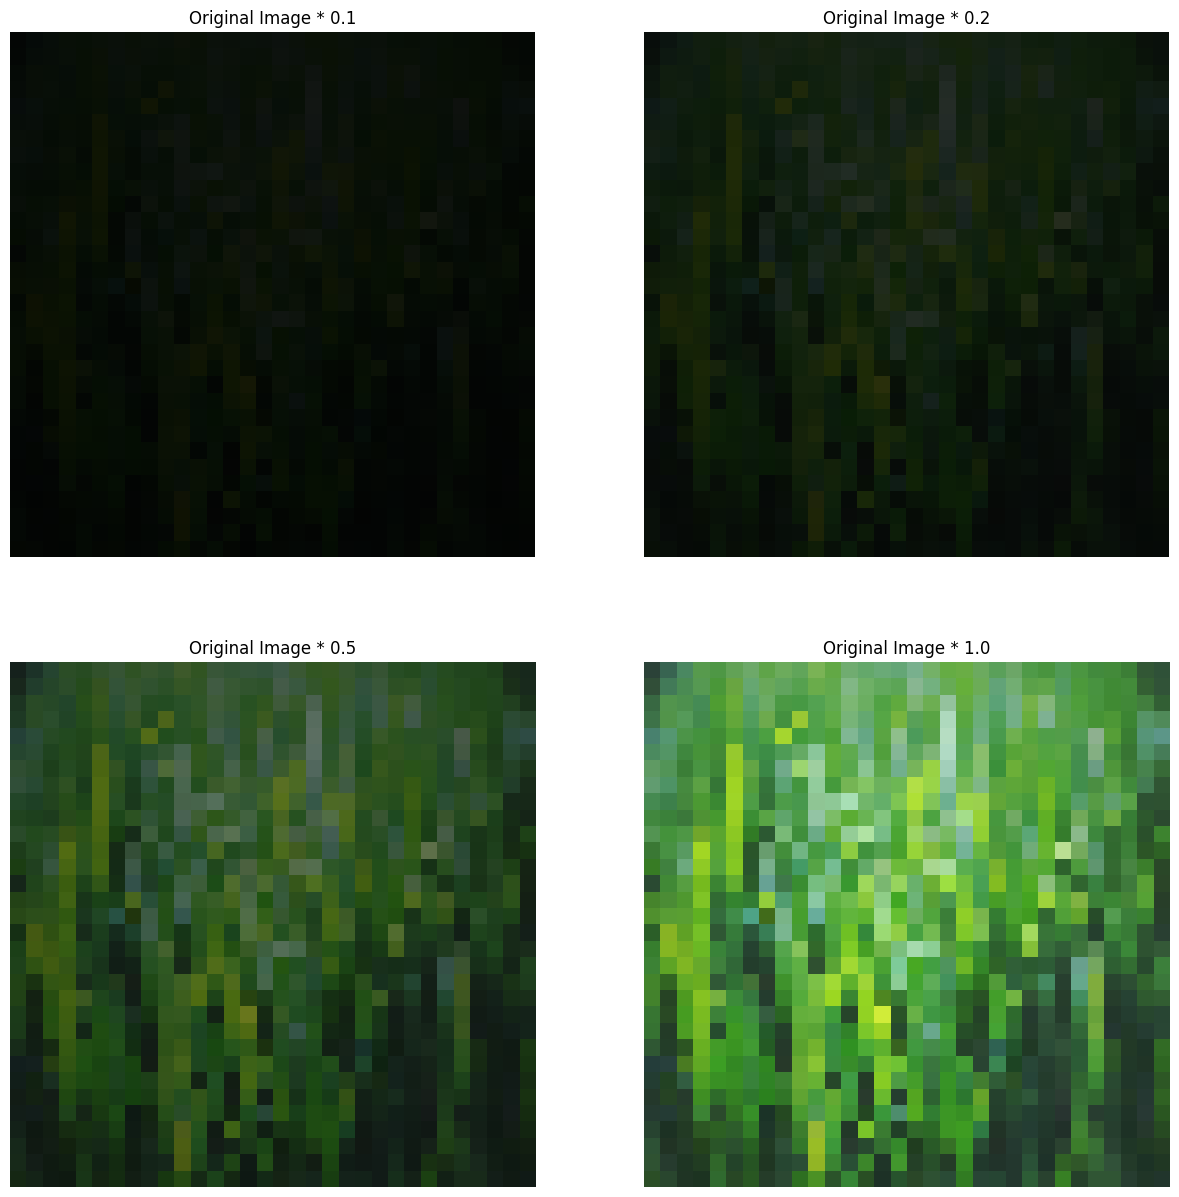

In [82]:
# Get/Take the first image from the tensor
image1 = image_tensor[0]

# # Converts the image to floating point representation
image1_float = image1.astype(float)

# Normalizes the pixel values to the range [0, 1]
image1_norm = image1_float / 255.0


# Performs element-wise multiplication operation
image1_mult01 = image1_norm * 0.1
image1_mult02 = image1_norm * 0.2
image1_mult05 = image1_norm * 0.5
image1_mult10 = image1_norm * 1.0

# Converts back to unsigned int representation for display purposes
image1_mult01 = np.clip(image1_mult01, 0, 1) * 255
image1_mult02 = np.clip(image1_mult02, 0, 1) * 255
image1_mult05 = np.clip(image1_mult05, 0, 1) * 255
image1_mult10 = np.clip(image1_mult10, 0, 1) * 255

image1_mult01 = image1_mult01.astype(np.uint8)
image1_mult02 = image1_mult02.astype(np.uint8)
image1_mult05 = image1_mult05.astype(np.uint8)
image1_mult10 = image1_mult10.astype(np.uint8)


print("\nimage1_mult01:",image1_mult01)
print("\nimage1_mult02:",image1_mult02)
print("\nimage1_mult05",image1_mult05)
print("\nimage1_mult10",image1_mult10)

# Dislay all the four images
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(image1_mult01)
plt.title('Original Image * 0.1')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image1_mult02)
plt.title('Original Image * 0.2')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(image1_mult05)
plt.title('Original Image * 0.5')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(image1_mult10)
plt.title('Original Image * 1.0')
plt.axis('off')

**What happened?**

>Based on the resulting images above, when the scalar value is less than 1 (e.g., 0.1, 0.2, and 0.5), the resulting images undergo a process known as `attenuation`. During attenuation, the `pixel values are diminished in intensity`, resulting in a perceptibly darker appearance compared to the original input image. The extent of attenuation increases proportionally as the scalar value decreases. For instance, the image subjected to multiplication by 0.1 exhibits a notably darker appearance than the one multiplied by 0.5.

> Conversely, when the scalar value is equal to 1 (e.g., 1.0), the resulting image remains unchanged as each pixel value is multiplied by 1, resulting in no change in intensity or appearance compared to the original input image. In this context, this operation is considered as an `identity operation`.

**Inspect the values of the matrix and determine the error**

> Upon checking the values of the matrix, specifically the one resulting from `Approach #1`, it was clearly seen that the values are floating-point values outside the range of [0,1]. In this regard, the error stems from the discrepancy between the data type expected by the image matrix and the fractional values used for element-wise multiplication. Specifically, in image processing (digital), pixel values are typically represented as integers ranging from 0 to 255, stored in a matrix format. These integers correspond to the brightness or color intensity of each pixel in the image. However, when performing element-wise multiplication with fractional values such as 0.1, 0.2, and 0.5, the resulting values may fall outside the expected range of [0, 255].

> This discrepancy can lead to two main issues. First, there's a `loss of precision due to the inherent limitations of integer data types` when dealing with fractional values. Multiplying integer pixel values by fractional scalars can result in truncated decimal values, leading to inaccuracies in the resulting image representation. Second, the `resulting values may exceed the valid range` expected by plotting functions like `imshow`, which typically expects pixel values to be within the range [0, 1] for floating-point data or [0, 255] for integer data.

**Resolve the error using your knowledge of matrix algebra and signal processing. Explain your solution.**

> From a digital signal processing (DSP) perspective, this observed error highlights the importance of normalization. In DSP, normalization ensures that signal magnitudes fall within a predefined range to facilitate accurate processing and analysis. Similarly, in image processing, pixel value normalization plays a crucial role in ensuring or preserving consistent behavior/information across different images. Whereas from a matrix algebra standpoint, the error can be attributed to the limitations of integer data types in representing fractional values accurately. Thus, upon executing the element-wise operation, the resulting images fail to display (which can also lead to distortion) altogether due to the disparity between the actual pixel values and the expected range of values.

> For this reason, I have implemented 2 approaches for my solution. `Approach #2` showcases my first attempt to resolve the image display error and remove the warning message upon code execution. In this approach, I only utilized the floating-point conversion alongside the clip function. By converting the image matrix to a floating-point format, the decimal precision of pixel values is preserved, mitigating the risk of truncation during element-wise multiplication with fractional scalars. Although the scalar values are all less than 1, it is safe to say that there will be no chance that a value within the matrix will exceed the maximum value of 255. However, for the purpose of ensuring robustness regardless of the scalar value, the clip function was included to handle any potential outliers.

> Moving on to my second solution, as depicted in `Approach #3`, I added the normalization step. Considering the DSP standpoint mentioned earlier, scaling the pixel values of the image matrix to the range [0, 1] before multiplication is essential to standardize signal magnitudes (which can also help preserve memory usage during processing) for further analysis and processing. Thus, normalizing pixel values to this range facilitates easier interpretation of results and ensures uniform processing across varied image datasets once they return to an integer type during post-processing.


## 3.3 Euclidean Distances

Compute the Euclidean distances between all of the images.

**What were the values?**
> See the output below.

In [83]:
from collections import Counter

# Defines the euclidean distance function
def Euclidean_distance(H1,H2):
    distance =0
    for i in range(len(H1)):
        distance += np.square(H1[i]-H2[i])
    return np.sqrt(distance)

img_histogram = [[] for _ in range(6)]

for i in range(1,7):
  # To simplify the data, we will flatten these channels so that each image is represented as a single one-dimensional array.
  flat_image = (image_tensor[i-1].ravel())
  # After converting our image files into arrays, we'll create a histogram for each image.

  #The given line of code produces a dictionary in which each key represents a pixel value, and the corresponding value of each key is the frequency of that pixel value in the image.
  img_hist_dict = Counter(flat_image)

  for j in range(256):
    # The purpose of this is to count the occurrences of each pixel value ranging from 0 to 255 in the image.
    if j in img_hist_dict.keys():
      img_histogram[i-1].append(img_hist_dict[j])
    else:
      img_histogram[i-1].append(0)


for i in range(1,7):
  print(f"\n For Image {i}")
  for j in range(1,7):
    euclidean_dist = Euclidean_distance(img_histogram[i-1],img_histogram[j-1])
    print(f"The distance between Reference_Image_{i} and Test Image_{j} : {euclidean_dist}")


 For Image 1
The distance between Reference_Image_1 and Test Image_1 : 0.0
The distance between Reference_Image_1 and Test Image_2 : 1450.6763939624855
The distance between Reference_Image_1 and Test Image_3 : 1068.4128415551734
The distance between Reference_Image_1 and Test Image_4 : 1912.3577071248988
The distance between Reference_Image_1 and Test Image_5 : 1639.2858201058166
The distance between Reference_Image_1 and Test Image_6 : 1357.822521539542

 For Image 2
The distance between Reference_Image_2 and Test Image_1 : 1450.6763939624855
The distance between Reference_Image_2 and Test Image_2 : 0.0
The distance between Reference_Image_2 and Test Image_3 : 1771.8318204615246
The distance between Reference_Image_2 and Test Image_4 : 2386.4689396679773
The distance between Reference_Image_2 and Test Image_5 : 2172.046500423046
The distance between Reference_Image_2 and Test Image_6 : 1957.1990190064985

 For Image 3
The distance between Reference_Image_3 and Test Image_1 : 1068.412

**What did you observe from images 1, 3, and 5? Experiment further and discuss your findings.**

> After analyzing the outcomes of the code execution, several noteworthy insights emerge.
Starting with `Images 3 and 6`, which exhibit the lowest Euclidean distance of `300.28`, it becomes apparent that these images possess a striking degree of similarity when compared to the other images in the dataset. This similarity is not only reflected in the computed distances but also corroborated by the visual content of the original images. Both Images 3 and 6 portray a broad green tree, suggesting a strong correlation between the visual features and the computed distances.

> Conversely, when `Image 1` is utilized as the reference image, significantly elevated distances are observed across all test images. Notably, `Image 3` stands out with the lowest distance of `1068.41`, indicating a relatively higher degree of similarity compared to the other test images. Similarly, `Image 2` displays relatively high Euclidean distances across all five test images, with its distances consistently ranking the highest among the respective test images. This consistency underscores the significant deviation of Image 2 from the dataset, suggesting that it possesses unique visual characteristics that distinguish it from the rest of the images.

> Furthermore, when `Image 5` is employed as the reference, a distinct pattern emerges with `Images 4` and `6` being identified as the most similar, boasting distances of `312.81` and `317.61`, respectively. This observed similarity can be attributed to their shared upright patterns, which contribute significantly to their likeness. This pattern extends further to `Image 5`'s resemblance to `Image 3`, evidenced by their distance of `586.17`.

```
------ END OF MACHINE PROJECT 1 --------
```